In [3]:
import pandas as pd

In [4]:
diabetes = pd.read_csv("diabetes.csv")

In [5]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [12]:
import tensorflow as tf

In [13]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [14]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [15]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [16]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


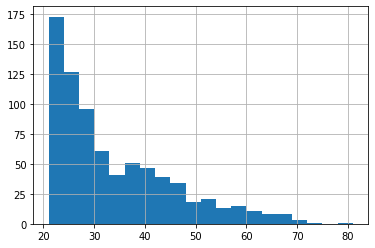

In [18]:
diabetes['Age'].hist(bins=20)

In [19]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [20]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

In [21]:
#Train Test Split

In [22]:
x_data = diabetes.drop('Class',axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [23]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [44]:
X_train.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
218,0.294118,0.427136,0.606557,0.222222,0.00000,0.432191,0.489325,32,A
83,0.000000,0.507538,0.532787,0.282828,0.00000,0.366617,0.067891,22,A
176,0.352941,0.427136,0.639344,0.000000,0.00000,0.464978,0.129804,42,B
53,0.470588,0.884422,0.737705,0.343434,0.35461,0.502235,0.166097,58,C
117,0.294118,0.391960,0.393443,0.000000,0.00000,0.502235,0.245944,25,D


In [27]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [31]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DeLL\\AppData\\Local\\Temp\\tmpgwe9zwza', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A67F0F390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\DeLL\AppData\Local\Temp\tmpgnpe2o7f\model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\DeLL\AppData\Local\Temp\tmpgnpe2o7f\model.ckpt.
INFO:tensorflow:loss = 7.4077473, step = 1001
INFO:tensorflow:global_step/sec: 252.79
INFO:tensorflow:loss = 7.3463945, step = 1101 (0.401 sec)
INFO:tensorflow:global_step/sec: 320.911
INFO:tensorflow:loss = 5.116378, step = 1201 (0.307 sec)
INFO:tensorflow:global_step/sec: 336.066
INFO:tensorflow:loss = 4.0752554, step = 1301 (0.301 sec)
INFO:tensorflow:global_step/sec: 451.492
INFO:tensorflow

In [32]:
#Eval the model
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,
                                                      shuffle=False)

In [33]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Could not find trained model in model_dir: C:\Users\DeLL\AppData\Local\Temp\tmpgwe9zwza, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-24T12:42:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-24-12:42:13
INFO:tensorflow:Saving dict for global step 0: accuracy = 0.6574803, accuracy_baseline = 0.65748036, auc = 0.5, auc_precision_recall = 0.6712598, average_loss = 0.6931472, global_step = 0, label/mean = 0.34251967, loss = 6.771515, precision = 0.0, prediction/mean = 0.5, recall = 0.0


In [34]:
results

{'accuracy': 0.6574803,
 'accuracy_baseline': 0.65748036,
 'auc': 0.5,
 'auc_precision_recall': 0.6712598,
 'average_loss': 0.6931472,
 'label/mean': 0.34251967,
 'loss': 6.771515,
 'precision': 0.0,
 'prediction/mean': 0.5,
 'recall': 0.0,
 'global_step': 0}

In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [36]:
predictions = model.predict(pred_input_func)

In [37]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Could not find trained model in model_dir: C:\Users\DeLL\AppData\Local\Temp\tmpgwe9zwza, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.], dtype=float32),
  'logistic': array([0.5], dtype=float32),
  'probabilities': array([0.5, 0.5], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.], dtype=float32),
  'logistic': array([0.5], dtype=float32),
  'probabilities': array([0.5, 0.5], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.], dtype=float32),
  'logistic': array([0.5], dtype=float32),
  'probabilities': array([0.5, 0.5], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.], dtype=float32),
  'logistic': array([0.5], dtype=float32),
  

In [38]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DeLL\\AppData\\Local\\Temp\\tmphzvu3pzw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A674D3EF0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [41]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_bucket]

In [46]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [47]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DeLL\\AppData\\Local\\Temp\\tmpvpq1q4jk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A673FBC50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DeLL\AppData\Local\Temp\tmpvpq1q4jk\model.ckpt.
INFO:tensorflow:loss = 6.884104, step = 1
INFO:tensorflow:global_step/sec: 193.748
INFO:tensorflow:loss = 5.0759745, step = 101 (0.520 sec)
INFO:tensorflow:global_step/sec: 360.243
INFO:tensorflow:loss = 3.470328, step = 201 (0.277 sec)
INFO:tensorflow:global_step/sec: 342.214
INFO:tensorflow:loss =

In [49]:
eval_input_func =  tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [50]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-24T12:55:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DeLL\AppData\Local\Temp\tmpvpq1q4jk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-24-12:57:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8093385, accuracy_baseline = 0.64785993, auc = 0.8749025, auc_precision_recall = 0.76626205, average_loss = 0.4239655, global_step = 1000, label/mean = 0.35214007, loss = 4.2396555, precision = 0.77483445, prediction/mean = 0.34418505, recall = 0.64640886
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\DeLL\AppData\Local\Temp\tmpvpq1q4jk\model.ckpt-1000


{'accuracy': 0.8093385,
 'accuracy_baseline': 0.64785993,
 'auc': 0.8749025,
 'auc_precision_recall': 0.76626205,
 'average_loss': 0.4239655,
 'label/mean': 0.35214007,
 'loss': 4.2396555,
 'precision': 0.77483445,
 'prediction/mean': 0.34418505,
 'recall': 0.64640886,
 'global_step': 1000}